###                                                                     Movies Rating EDA

#### Submitted by:
- Ravi Ranjan
- Paras Prakash 

## Table of Contents

- 1. [Problem Statement](#section1)
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data Loading and Description](#section102)
- 2. [Load the packages and data](#section2)</br>
- 3. [Data Profiling](#section3)
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [observations](#section306)<br/>
    - 3.7 [Hypothesis](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Renaming complex column name](#section401)<br/>
    - 4.2 [Dealing with missing data](#section402)<br/>
    - 4.3 [Creating dataframes for Director, Actor and Genre](#section403)<br/>
        - 4.3.a [dataframes for Director](#section403a)<br/>            
        - 4.3.b [dataframes for Actor](#section403b)<br/>
        - 4.3.c [dataframes for Genre](#section403c)<br/>
- 5. [Post Profiling](#section5)</br>
- 6. [Identify patterns in the data](#section6)</br>
    - 6.1 [Correlation of Features](#section601)<br/>
    - 6.2 [Revenue vs Year](#section602)<br/>
    - 6.3 [Rating vs Year](#section603)<br/>
    - 6.4 [Genre vs Metascore average](#section604)<br/>
    - 6.5 [Genre vs Runtime average](#section605)<br/>
- 7. [Questions](#section7)
    - 7.1 [What are the unique genres?](#section701)<br/>
    - 7.2 [What is user movie-rating trend?](#section702)<br/>
    - 7.3 [How user votes related to rating?](#section703)<br/>
    - 7.4 [How much hit movies are present in dataset?](#section704)<br/>
    - 7.5 [Which genres earn most and least rating?](#section705)<br/>
    - 7.6 [Which genres get most and least user votes?](#section706)<br/>
    - 7.7 [Which genres earn most and least revenues?](#section707)<br/>
    - 7.8 [What makes gross revenue increase? How are these variables related to each other?](#section708)<br/>
    - 7.9 [Determine the amount of movies that were produced each year, from 2006-2016?](#section709)<br/>
    - 7.10 [How rating varies with different parameters?](#section710)<br/>
    - 7.11 [How many romantic movies released each year?](#section711)<br/>
    - 7.12[What is the percentage of Total Movies Made from Top 5 Genres?](#section712)<br/>
    - 7.13[Taking a sum of the total movies made by top 5 genres, which contributed to the most in terms of movies made?](#section713)<br/>
    - 7.14[What is the percentage of Total Movies Made by Top 5 Actors?](#section714)<br/>
    - 7.15[Taking a sum of the total movies made by top 5 actors, which contributed to the most in terms of movies made?](#section715)<br/>
    - 7.16[What is the revenue percentage of Total Movies Made from Top 5 Genres?](#section716)<br/>
    - 7.17[Taking a sum of the revenue from the top 5 genres, which contributed to the most in terms of revenue?](#section717)<br/>
    - 7.18[Who are the top Directors in terms of number of films directed by them? Also, determine how much revenue earned by each director?](#section718)<br/>
- 8. [Conclusions](#section8)<br/>  

<a id="section1"></a>
### 1. Problem Statement
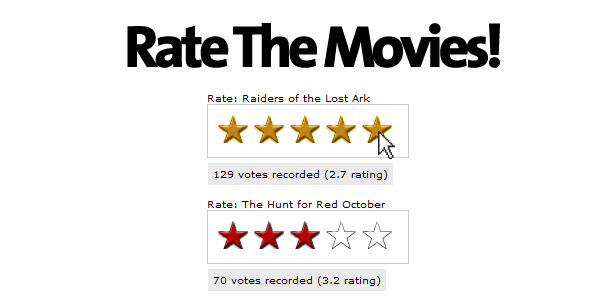
"This dataset is about 1000 movie rating. How a movie Producer can determine a combination for making a movie with good rating and good revenue earning?"

<a id="section101"></a>
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation, some questions are also answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id="section102"></a>
### 1.2. Data Loading and Description

__a__. Description of dataset
- This dataset consists of information about the top 1000 movies rating details. 
- And for each movie we have details against 12 separate columns. The below table is showing name of all these columns and its descriptions.

| Column Name         | Description                                      |
| ------------------- |:-------------                                   :| 
| Rank                | index                                            | 
| Title               | Movie name (Title)                               |  
| Genre               | Genre of movie (consist of multiple genre name)  | 
| Description         | Brief overview about movie                       |   
| Director            | Name of Director                                 |
| Actors              | Name of Actors (consist of multiple values)      |
| Year                | Release year of movie                            |
| Runtime (Minutes)   | Movie duration in minutes                        |
| Rating              | Rating of movie between 0 to 10                  |
| Votes               | User votes for movie                             |
| Revenue (Millions)  | Movie revenue in millions                        |
| Metascore           | Metascore of movie between 0 to 100              |


__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 

#### Importing packages

In [108]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import itertools

import warnings                                                    # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                          # Display all dataframe columns in outputs (it has 12 columns, which is wider than the notebook)
                                                                   # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

#### Importing dataset

In [109]:
movies_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")     # Importing training dataset using pd.read

<a id="section3"></a>
### 3. Data Profiling
Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a>

In [110]:
movies_data.dtypes                                  # Display the data type for each variable

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

<a id=section302></a> 

In [111]:
movies_data.head(5)                              # Display the first five rows of the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section303></a> 

In [112]:
movies_data.describe(include = 'all')            # Descriptive statistics for the numerical variables

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A Naval veteran arrives home from war unsettle...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [113]:
movies_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<a id=section304></a> 

In [114]:
movies_data.sample(10)                           # Display a random 10 rows from the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
394,395,Grown Ups 2,Comedy,After moving his family back to his hometown t...,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",2013,101,5.4,114482,133.67,19.0
33,34,Deadpool,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
537,538,The Do-Over,"Action,Adventure,Comedy",Two down-on-their-luck guys decide to fake the...,Steven Brill,"Adam Sandler, David Spade, Paula Patton, Kathr...",2016,108,5.7,24761,0.54,22.0
170,171,Nightcrawler,"Crime,Drama,Thriller","When Louis Bloom, a con man desperate for work...",Dan Gilroy,"Jake Gyllenhaal, Rene Russo, Bill Paxton, Riz ...",2014,118,7.9,332476,32.28,76.0
189,190,Trainwreck,"Comedy,Drama,Romance",Having thought that monogamy was never possibl...,Judd Apatow,"Amy Schumer, Bill Hader, Brie Larson, Colin Quinn",2015,125,6.3,106364,110.01,75.0
952,953,Sex and the City 2,"Comedy,Drama,Romance","While wrestling with the pressures of life, lo...",Michael Patrick King,"Sarah Jessica Parker, Kim Cattrall, Kristin Da...",2010,146,4.3,62403,95.33,27.0
885,886,Babel,Drama,Tragedy strikes a married couple on vacation i...,Alejandro González Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...",2006,143,7.5,253417,34.30,69.0
446,447,Dredd,"Action,Sci-Fi","In a violent, futuristic city where the police...",Pete Travis,"Karl Urban, Olivia Thirlby, Lena Headey, Rache...",2012,95,7.1,213764,13.40,59.0
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.52,69.0
166,167,Now You See Me 2,"Action,Adventure,Comedy",The Four Horsemen resurface and are forcibly r...,Jon M. Chu,"Jesse Eisenberg, Mark Ruffalo, Woody Harrelson...",2016,129,6.5,156567,65.03,46.0


<a id=section305></a> 
#### Pandas profiling

In [115]:
profile = pandas_profiling.ProfileReport(movies_data)
profile.to_file(outputfile="movies_before_preprocessing.html")

<a id=section306></a> 

<a id=section306></a> 
#### Observation
- Summary of data types in this dataset:
 - <em>Numeric</em>: __Rank__ (integer), __Year__ (integer), __Runtime (Minutes)__ (integer), __Rating__ (Float), __Votes__ (integer), __Revenue (Millions)__ (Float), __Metascore__ (Float)
 - <em>Object</em>: Everything else
- As we can see there in each row, "Actors" and "Genres" column has multiple values.To analyze the genre and actor from this dataset, we need to segregate multiple values into single values.
- There are 64 missing values for "Metascore" column and 128 missing values for Revenue "(Millions)". So, we can replace these missing values with mean values for analysis.

<a id=section307></a> 
#### 3.7. Hypothesis
- Good rating movie should have good metascore.
- Revenue should have high correlation with number of votes
- Movies in which technologies are used on large scale like scientific, animation, action should earn good revenue as it attracts more viewers.
- Combination of Director, Actor and Genre of good revenue pattern is a good choice for making a good revenue earning movie. 
- Old movies revenue should be less as compared to new movies as the economy has evolved by the time.

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a> 
#### 4.1. Renaming complex column name
- "Runtime (Minutes)" column renamed to "runtime_minutes"
- "Revenue (Millions)" column renamed to "revenue_millions"

In [116]:
movies_data.rename(columns={'Runtime (Minutes)': 'runtime_minutes', 'Revenue (Millions)': 'revenue_millions'}, inplace=True)

<a id=section402></a> 
#### 4.2. Dealing with missing data 
For pre-processing the data, let's replace the missing values with mean values.

In [117]:
median_revenue = movies_data.revenue_millions.median()
median_metascore = movies_data.Metascore.median()
movies_data.revenue_millions.fillna(median_revenue, inplace = True)
movies_data.Metascore.fillna(median_metascore, inplace = True)

<a id=section403></a> 
#### 4.3. Creating dataframes for Director, Actor and Genre

<a id=section403a></a> 
#### 4.3.a. Dataframe for Director

In [149]:

df_directors = movies_data.groupby('Director').apply(lambda x: \
                                                   pd.Series({'rating_mean':x.Rating.mean(),
                                                            'revenue_mean':x.revenue_millions.mean(),
                                                            'runtime_mean':x.runtime_minutes.mean(),
                                                            'vote_average':x.Votes.mean(),
                                                            'title':x.Director.count()}))
df_directors.sample(3)

,rating_mean,revenue_mean,runtime_mean,vote_average,title
Director,,,,,
Mark Osborne,7.6,215.400,92.0,329788.0,1.0
Hugo Gélin,7.4,47.985,118.0,5496.0,1.0
Ewan McGregor,6.1,47.985,108.0,7115.0,1.0


<a id=section403b></a> 
#### 4.3.b. Dataframe for Actor 
First splitting the multiple values of Actor in different columns then creating multiple dataframes for each actor column.After that concatenate the all actor dataframes grouped by individual actor.

In [119]:
movies_actor_data = movies_data.join(movies_data['Actors'].str.split(',', 3, expand=True).rename(columns={0:'Actor_1', 1:'Actor_2',2:'Actor_3', 3:'Actor_4'}))
#movies_actor_data.head()
actor1 = movies_actor_data[['Actor_1','Rating','revenue_millions','Votes']]\
    .rename(index=str, columns={"Actor_1": "actor"})
actor2 = movies_actor_data[['Actor_2','Rating','revenue_millions','Votes']]\
    .rename(index=str, columns={"Actor_2": "actor"})
actor3 = movies_actor_data[['Actor_3','Rating','revenue_millions','Votes']]\
    .rename(index=str, columns={"Actor_3": "actor"})
actor4 = movies_actor_data[['Actor_4','Rating','revenue_millions','Votes']]\
    .rename(index=str, columns={"Actor_4": "actor"})

actors = pd.concat([actor1, actor2, actor3,actor4]).reset_index(drop=True)

df_actors = actors.groupby('actor').apply(lambda x: pd.Series({'votes_average':x.Votes.mean(),
                                                               'revenue_average':x.revenue_millions.mean(),
                                                               'rating_average':x.Rating.mean(),
                                                               'title':x.actor.count()}))
df_actors.sample(3)

,votes_average,revenue_average,rating_average,title
actor,,,,
James Marsden,49041.0,26.76,6.7,1.0
Rana Daggubati,76193.0,6.50,8.3,1.0
Antonia Ribero,61812.0,4.21,7.1,1.0


<a id=section403c></a> 
#### 4.3.c. Dataframe for Genre 
First splitting the multiple values of Genre in different columns then creating multiple dataframes for each genre column.After that concatenate the all genre dataframes grouped by unique genre.

In [120]:
movies_genre_data = movies_data.join(movies_data['Genre'].str.split(',', 2, expand=True).rename(columns={0:'genre_1', 1:'genre_2',2:'genre_3'}))
#movies_genre_data.head()
genre1 = movies_genre_data[['genre_1','Rating','revenue_millions','runtime_minutes','Votes','Metascore']]\
    .rename(index=str, columns={"genre_1": "genre"})
genre2 = movies_genre_data[['genre_2','Rating','revenue_millions','runtime_minutes','Votes','Metascore']]\
    .rename(index=str, columns={"genre_2": "genre"})
genre3 = movies_genre_data[['genre_3','Rating','revenue_millions','runtime_minutes','Votes','Metascore']]\
    .rename(index=str, columns={"genre_3": "genre"})

genres = pd.concat([genre1, genre2, genre3]).reset_index(drop=True)

df_genres = genres.groupby('genre').apply(lambda x: pd.Series({'votes_average':x.Votes.mean(),
                                                               'revenue_average':x.revenue_millions.mean(),
                                                               'runtime_average':x.runtime_minutes.mean(),
                                                               'rating_average':x.Rating.mean(),
                                                               'metascore_average':x.Metascore.mean(),
                                                               'title':x.genre.count()}))
df_genres.sample(3)

,votes_average,revenue_average,runtime_average,rating_average,metascore_average,title
genre,,,,,,
Musical,173376.200000,81.642000,127.600000,6.940000,60.000000,5.0
Music,117435.562500,47.127188,112.187500,7.075000,60.687500,16.0
Romance,124617.503546,42.969574,113.007092,6.685816,55.744681,141.0


<a id="section5"></a>
### 5. Post Profiling

In [121]:
profile = pandas_profiling.ProfileReport(movies_data)
profile.to_file(outputfile="movies_after_preprocessing.html")

We have preprocessed the data, now the dataset does not contain missing values

<a id="section6"></a>
### 6. Identify patterns in the data

<a id="section601"></a>
#### 6.1. Correlation of Features
Let's see now the correlation between all these variables among themselves.

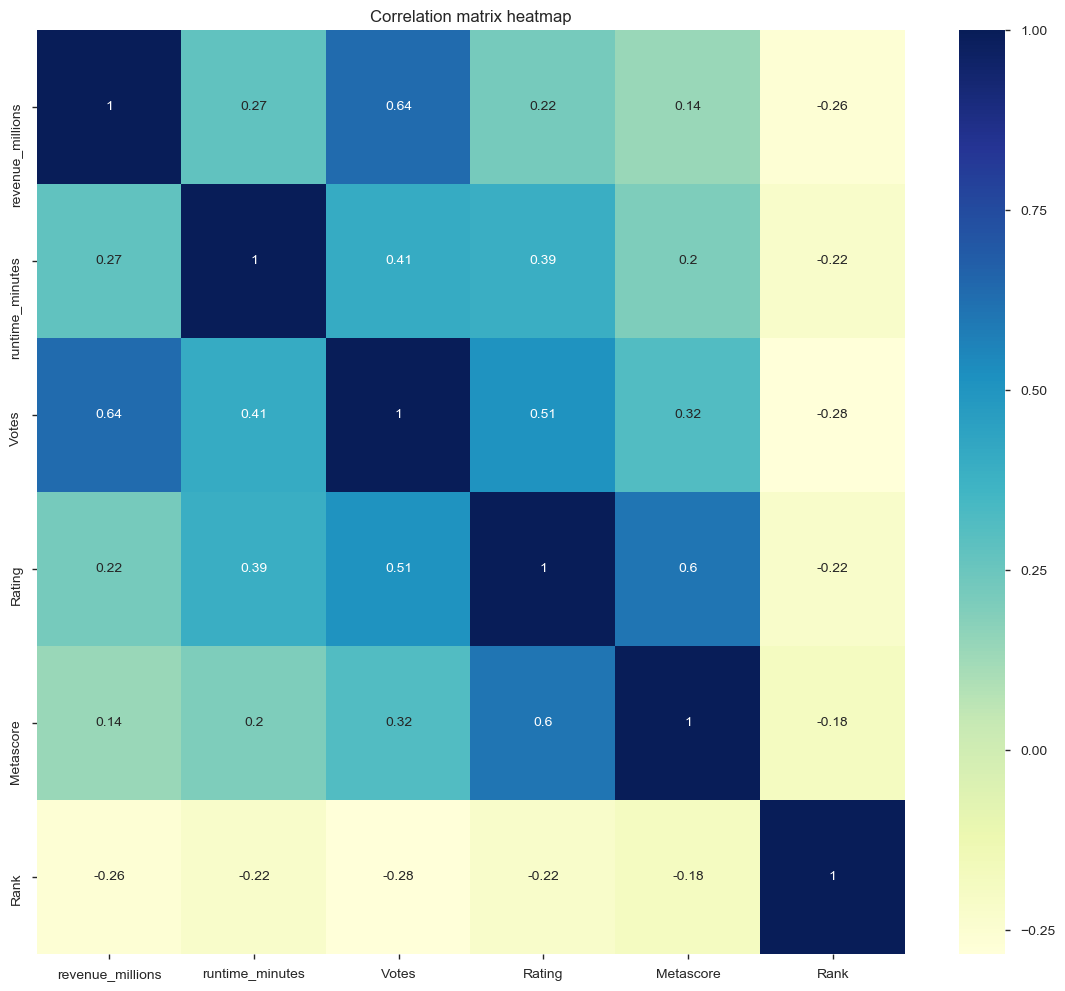

In [122]:
fig, ax = plt.subplots(figsize=(14,12));
new = movies_data[['revenue_millions', 'runtime_minutes', 'Votes', 'Rating','Metascore','Rank']].copy()
new = new.corr()
sns.heatmap(new, ax=ax, annot=True, cmap="YlGnBu");
ax.set_title('Correlation matrix heatmap');

__From above, We can observe that there is high co-relation between :__
    - Votes and Revenue
    - Votes and Rating
    - Rating and Metascore

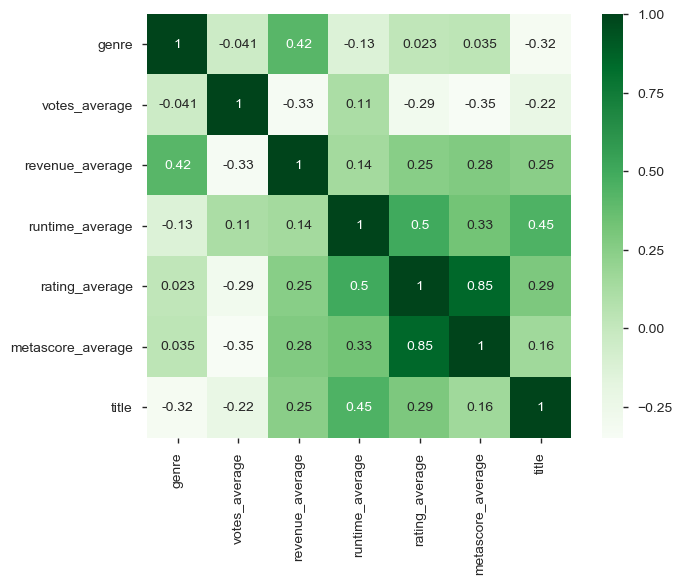

In [123]:
main_genres = df_genres.sort_values('title', ascending=False)
a = main_genres.reset_index()
movies_data_new = a.copy(deep=True)    

from sklearn.preprocessing import LabelEncoder           # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                  # in order to find the correlation between variables, we do Label encoding 
for i in movies_data_new.columns:                                                          
    movies_data_new[i] = number.fit_transform(movies_data_new[i].astype('str'))

corr=movies_data_new.corr()['genre']
corr[np.argsort(corr,axis=0)[::-1]]

features_correlation = movies_data_new.corr()
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Greens')
plt.show()

__From above, We can conclude that Genre and Revenue has higher co-relation__

<a id="section602"></a>
#### 6.2. Revenue vs Year

Text(0.5,1,'year Vs. Revenue')

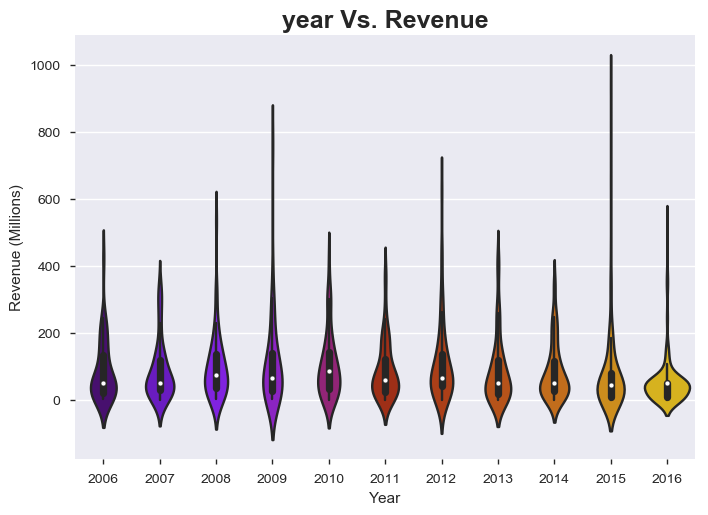

In [124]:
ax = sns.violinplot(x="Year", y="revenue_millions", palette="gnuplot", data=movies_data)
plt.ylabel("Revenue (Millions)")
plt.title("year Vs. Revenue", fontsize=18, fontweight = "bold")

- In year 2016, there is higher number of movies with high revenue in other words low-earning movies were less as compared to that of the other years.

<a id="section603"></a>
#### 6.3. Rating vs Year

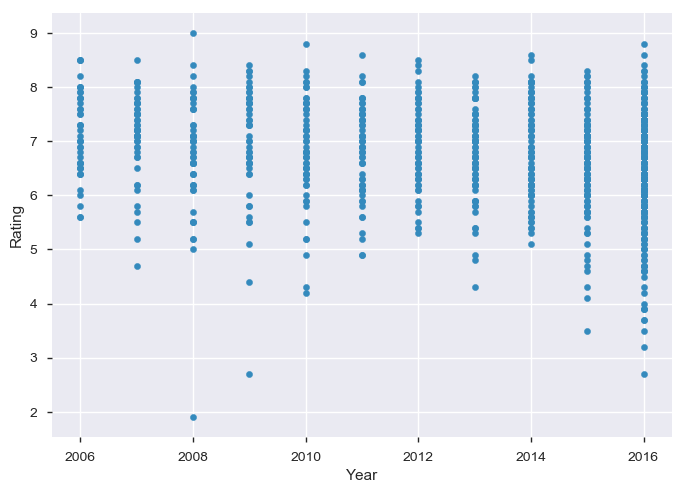

In [125]:
movies_data.plot.scatter(x='Year', y='Rating')

__From above, we can infer that__
    - Most variation in rating happened in 2016
    - Most common rating values are between 6 to 8
    - Most of the movies made in 2006 are of good rating than that for other years.

<a id="section7"></a>
### 7. Questions

<a id="section701"></a>
#### 7.1. what are the unique genres?
Films of the dataset are consist of multiple genres, So, for analysis, we need to find the unique genre names

In [126]:
unique_genres = movies_data['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

print('Unique genre names : ',individual_genres)
print('Total unique genre : ',len(individual_genres))

Unique genre names :  {'Action', 'Music', 'Comedy', 'Fantasy', 'Crime', 'Adventure', 'Horror', 'Animation', 'History', 'War', 'Musical', 'Romance', 'Drama', 'Sport', 'Western', 'Thriller', 'Mystery', 'Biography', 'Family', 'Sci-Fi'}
Total unique genre :  20


<a id="section702"></a>
#### 7.2. What is user movie-rating trend?
Rating distribution graph can determine the range with high probability

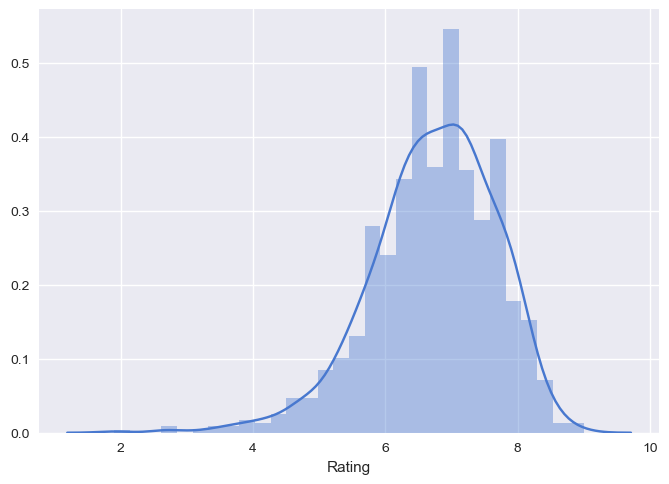

In [127]:
sns.set(color_codes=True)                           # Plot a histogram of the Rating (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(movies_data["Rating"].dropna());

- As we can see that probability of rating between 6.5 to 7.5 is high

<a id="section703"></a>
#### 7.3. How user votes related to rating?

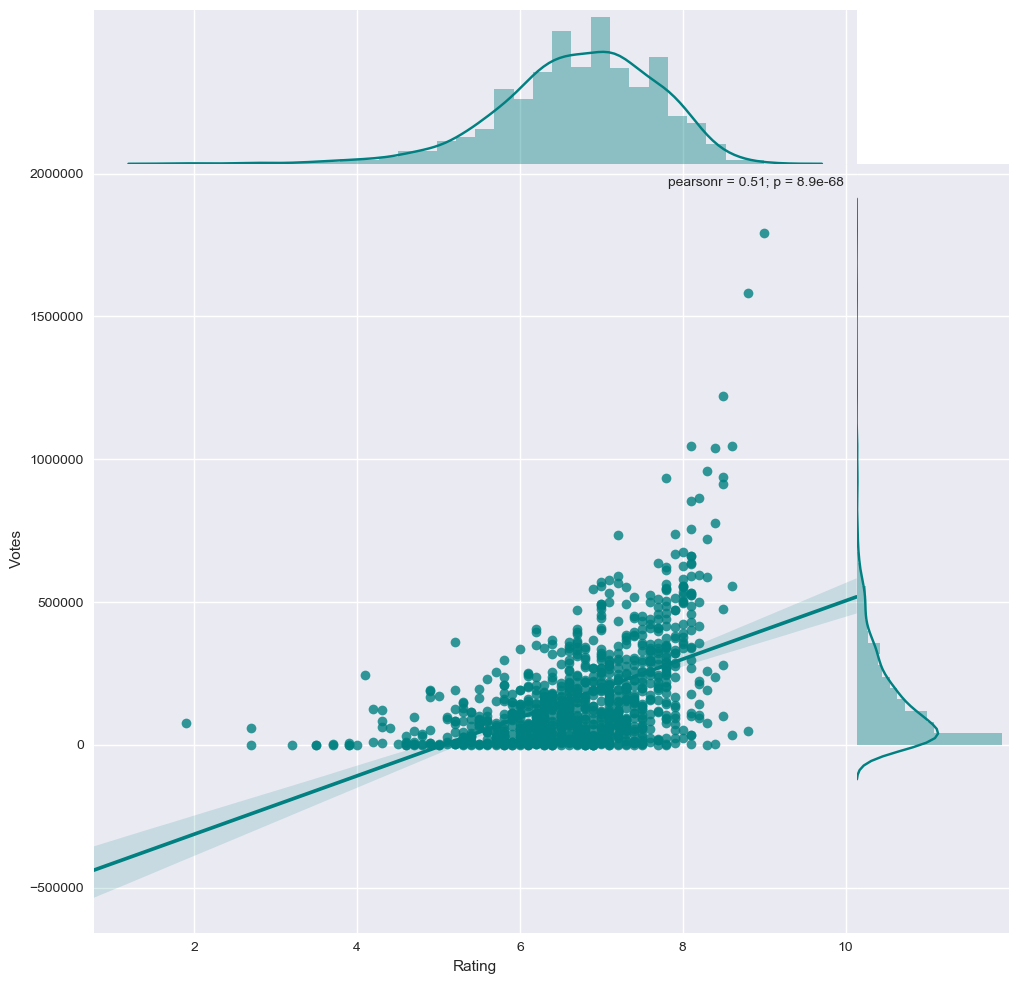

In [128]:
ax = sns.jointplot(x='Rating', y='Votes', data=movies_data, color='teal', size=10, space=0, kind='reg')

- From above graph, There is not a strong following pattern between Votes and Rating. So, we can get inference from here is that movie viewer can vote good or bad rating. So, number of votes is not a true criteria for good rating.

<a id="section704"></a>
#### 7.4. How much hit movies are present in dataset if the categorisation standard of movies based on rating is as follow: 
| Rating   | Status     |
| ---------|:----------:| 
| <3       | Flop       | 
| 3-5      | Average    |  
| 5-7      | Good       | 
| >7       | Hit        |

In [129]:
movies_data['rating_group'] = pd.cut(movies_data['Rating'].dropna(),
                         [0,3,5,7,10],
                         labels=['flop(rating<3)','average(rating between 3 to 5)','good(rating between 5 to 7)','hit(rating>7)'], include_lowest=True)
movies_data['rating_group'].value_counts()

good(rating between 5 to 7)       554
hit(rating>7)                     399
average(rating between 3 to 5)     44
flop(rating<3)                      3
Name: rating_group, dtype: int64

Text(0,0.5,'Number of movies')

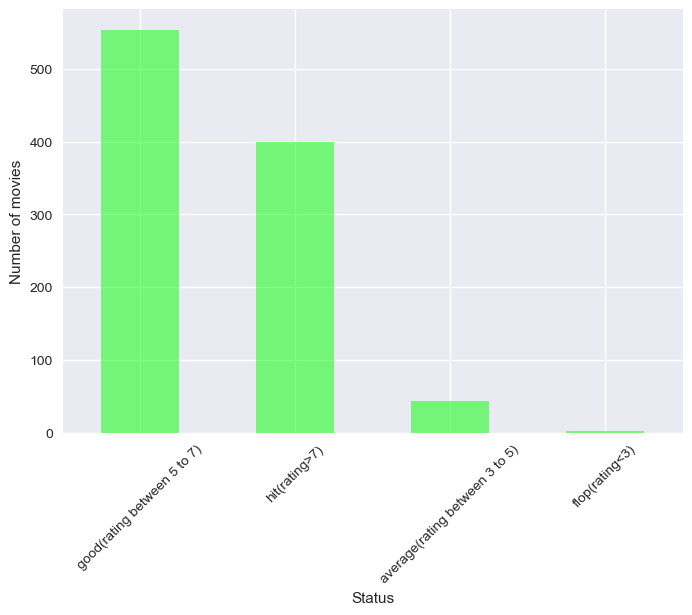

In [151]:
movies_data['rating_group'].value_counts().plot(kind='bar', color='lime', alpha=0.5, rot=45)
plt.xlabel('Status')
plt.ylabel('Number of movies')

- Total number of hit movies present in dataset is 554.
- From above, Most of the movies present in dataset have rating greater than 5 and are in either good or hit category.

<a id="section705"></a>
#### 7.5. Which genres get most and least rating?

Text(0.5,1,'Genre Vs. Rating Average')

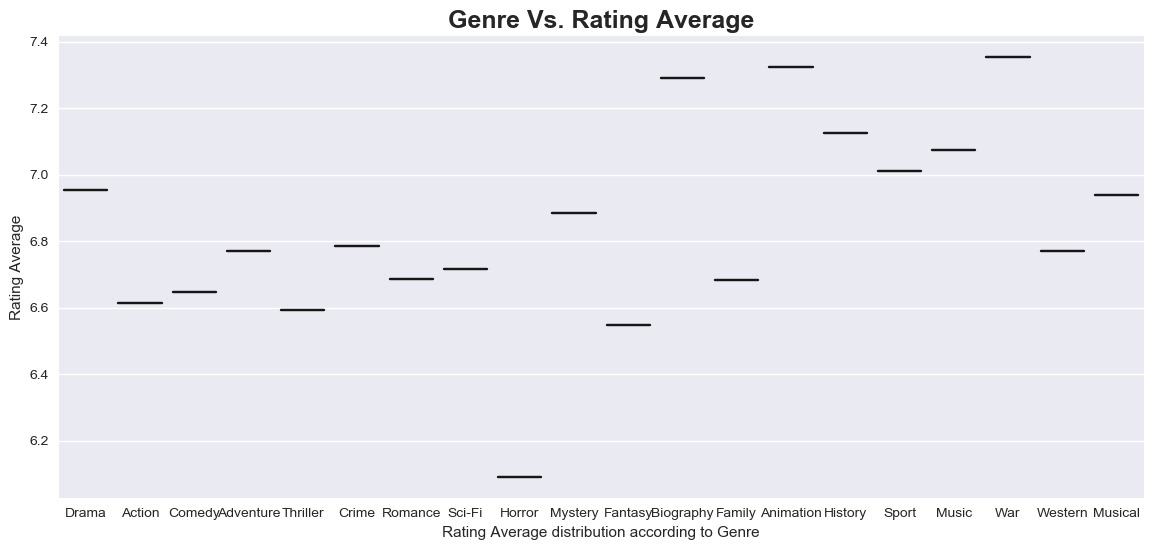

In [131]:
fig, ax = plt.subplots(figsize=(14,6));
ax = sns.violinplot(x="genre", y="rating_average", palette="gnuplot", data=a)
plt.xlabel("Rating Average distribution according to Genre")
plt.ylabel("Rating Average")
plt.title("Genre Vs. Rating Average", fontsize=18, fontweight = "bold")

- War movies have highest average rating and Horror movies have lowest average rating.
- Also, Good rating movies geners are : __Biography, Animation, War, History, Music and Sports__.
- Horror movies get very low rating.
- Rest of the Generes are getting average rating.

<a id="section706"></a>
#### 7.6. Which genres get most and least user votes?

Text(0.5,1,'Genre Vs. Votes Average')

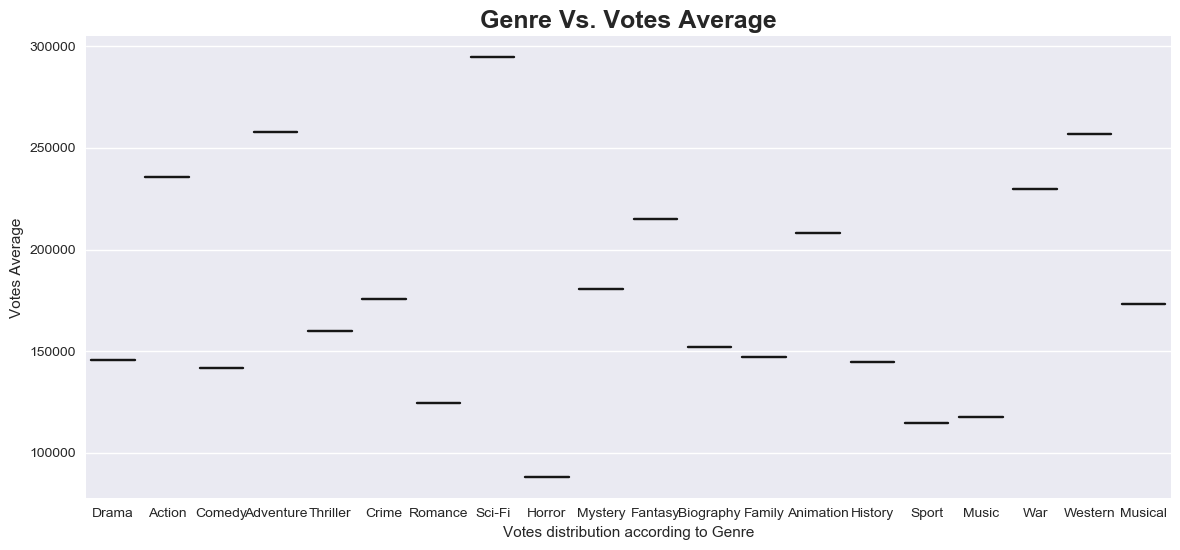

In [132]:
fig, ax = plt.subplots(figsize=(14,6));
ax = sns.violinplot(x="genre", y="votes_average", palette="gnuplot", data=a)
plt.xlabel("Votes distribution according to Genre")
plt.ylabel("Votes Average")

plt.title("Genre Vs. Votes Average", fontsize=18, fontweight = "bold")

- Movies of following geners get good number of votes : __Sci-Fi, Adventure, Western, Action, War__.
- Movies of following geners get less number of votes : __Horror, Sport, Music, Romance__.
- Vote average can gives the prediction of number of viewers. So, If we consider this as true then we can say that viewers are more interested in Technology base movies(people loves technology) and least interested in Horror movies(Nobody wants to get horrified)

<a id="section707"></a>
#### 7.7. Which genres earn most and least revenues?

Text(0.5,1,'Genre Vs. Revenue Average')

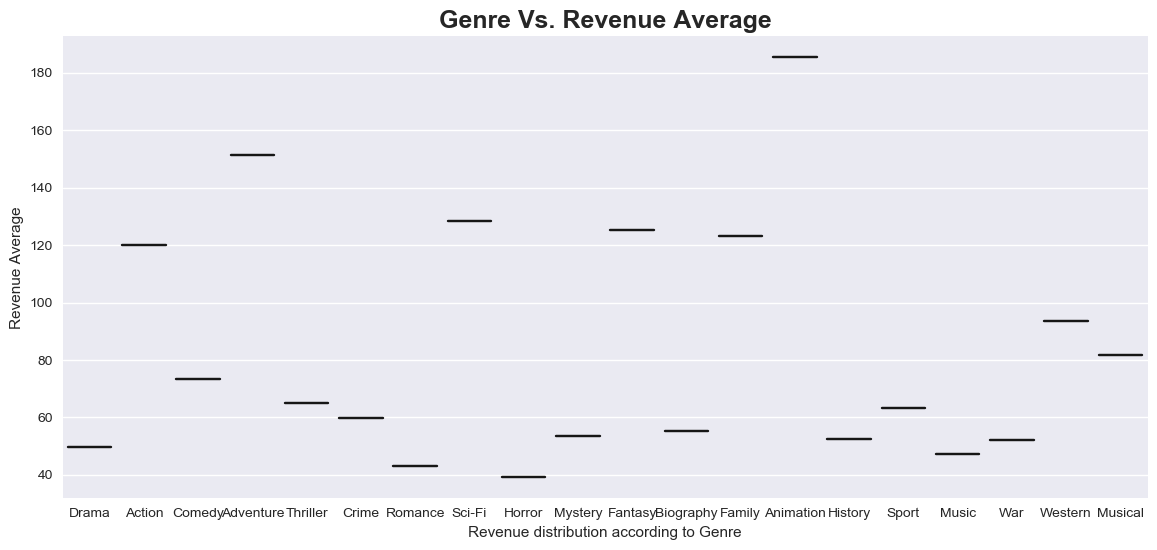

In [133]:
fig, ax = plt.subplots(figsize=(14,6));
ax = sns.violinplot(x="genre", y="revenue_average", palette="gnuplot", data=a)
plt.xlabel("Revenue distribution according to Genre")
plt.ylabel("Revenue Average")

plt.title("Genre Vs. Revenue Average", fontsize=18, fontweight = "bold")

- Animation genre movies earn most revenues.
- Following genres' movies earn high revenue: __Animation, Adventure, Sci-Fi, Fantasy, family, Action__.
- Rest of genres are not a good deal from revenue perspective.

<a id="section708"></a>
#### 7.8. What makes gross revenue increase? How are these variables related to each other?
- We should also evaluate how the important of available features changed with time.

__First of all, we should understand how is the revenue variance. An histogram should be useful.__

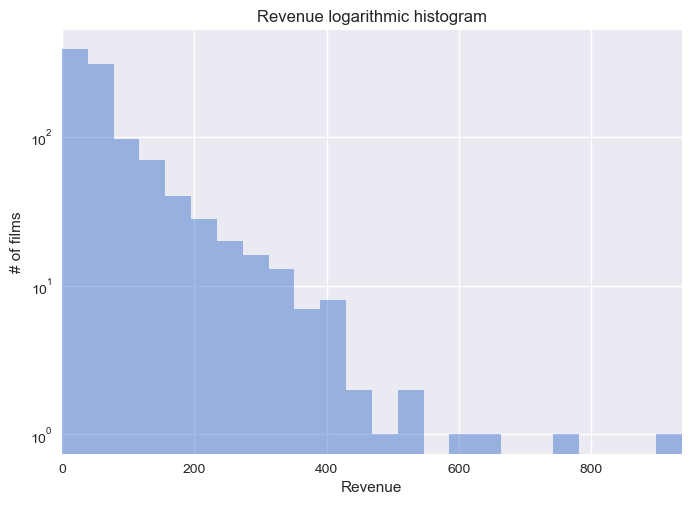

In [134]:
def plot_histogram(dataframe,column_name,tit='',xlabel='',ylabel='',log=False):
    bins = np.linspace(dataframe[column_name].min(),dataframe[column_name].max(),25)
    plt.xlim([dataframe[column_name].min(),dataframe[column_name].max()])
    plt.hist(dataframe[column_name], bins=bins, alpha=0.5,log=log)
    plt.title(tit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_histogram(movies_data,'revenue_millions',ylabel='# of films',xlabel='Revenue',tit='Revenue logarithmic histogram',log=True)

- Very less number of movies earn more than 400 million.

#### Let's see how revenue correlates with some other film figures

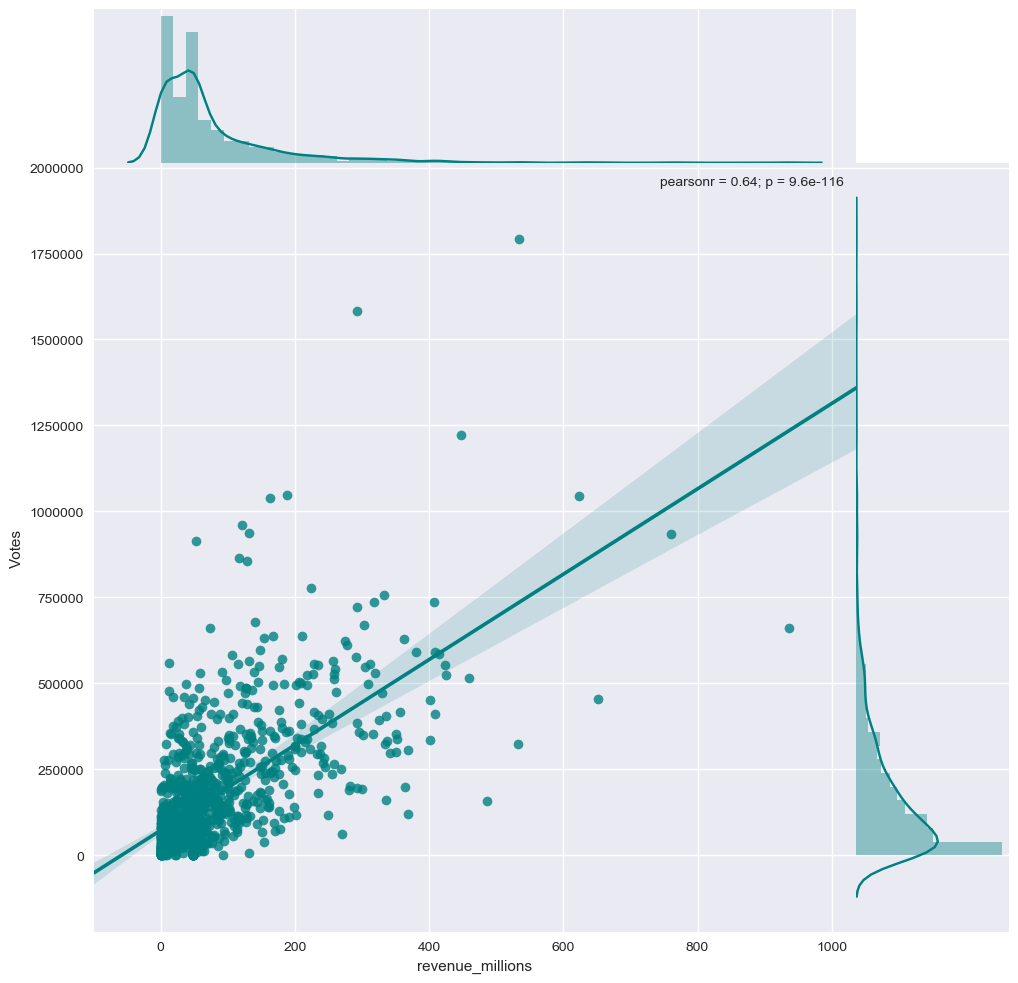

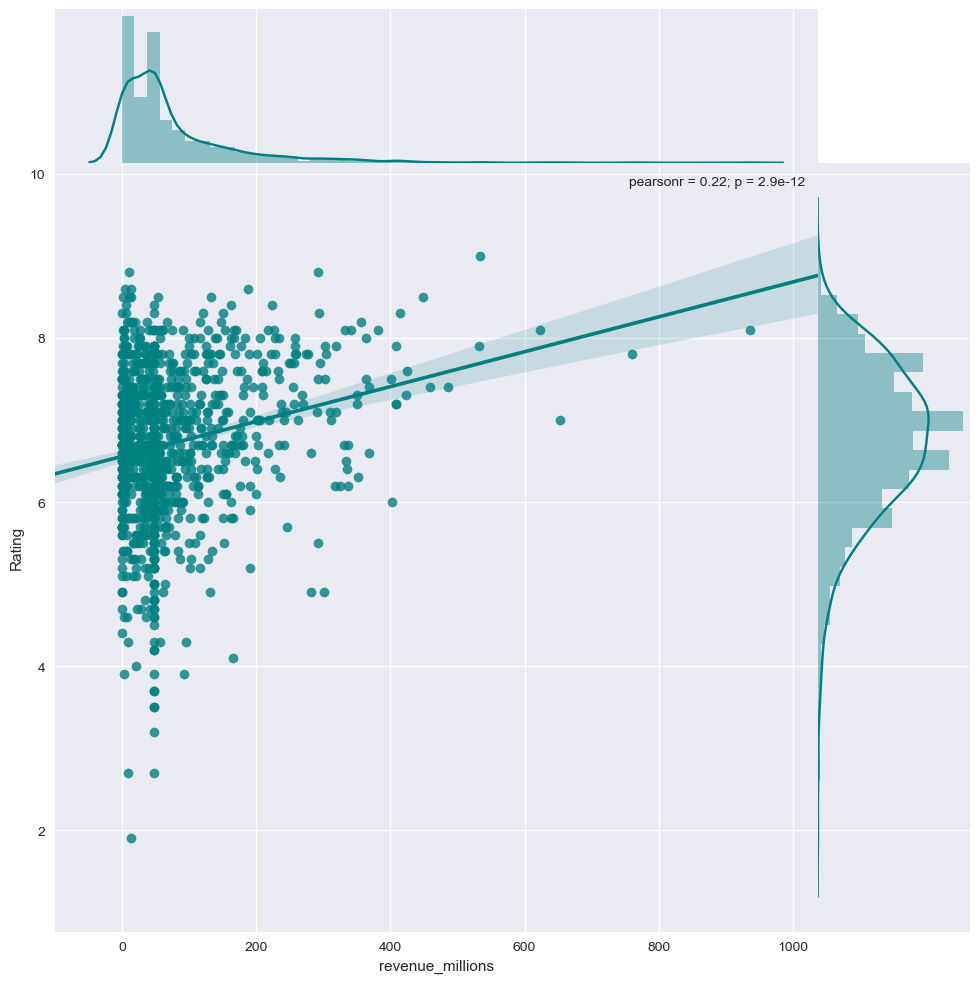

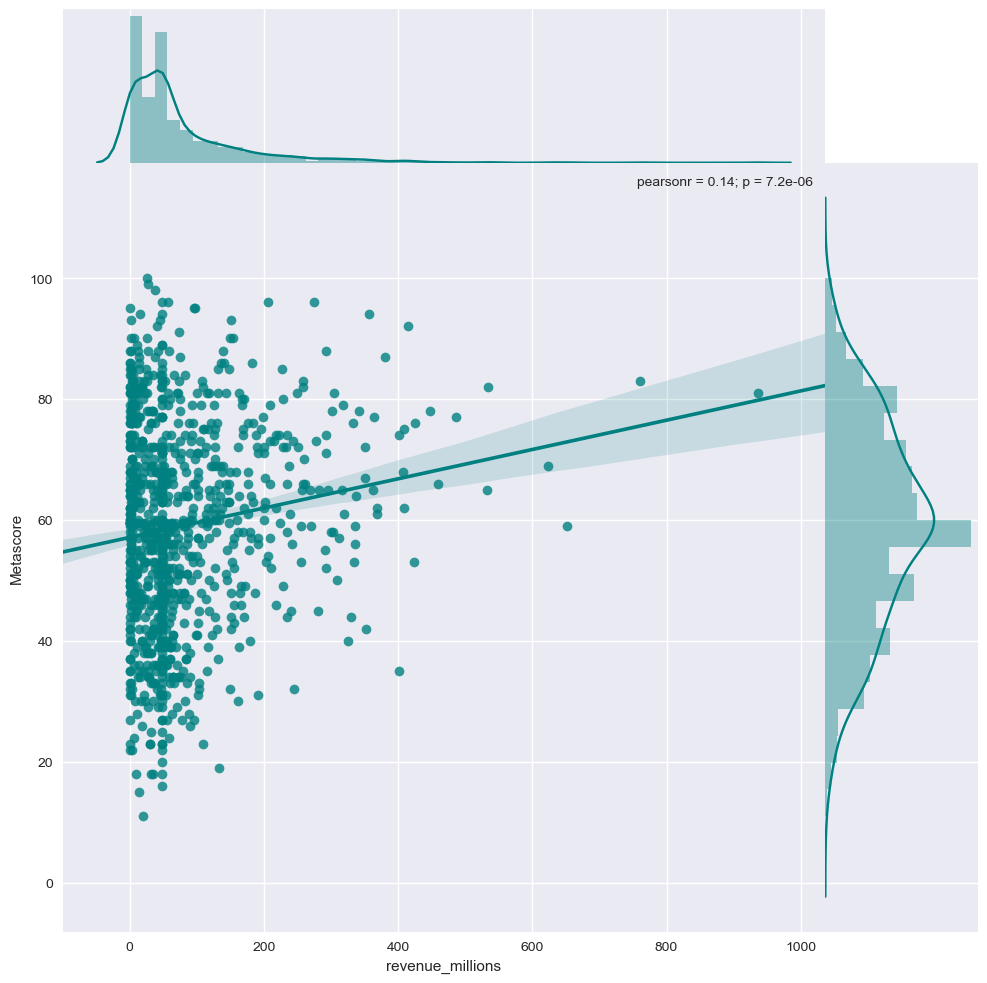

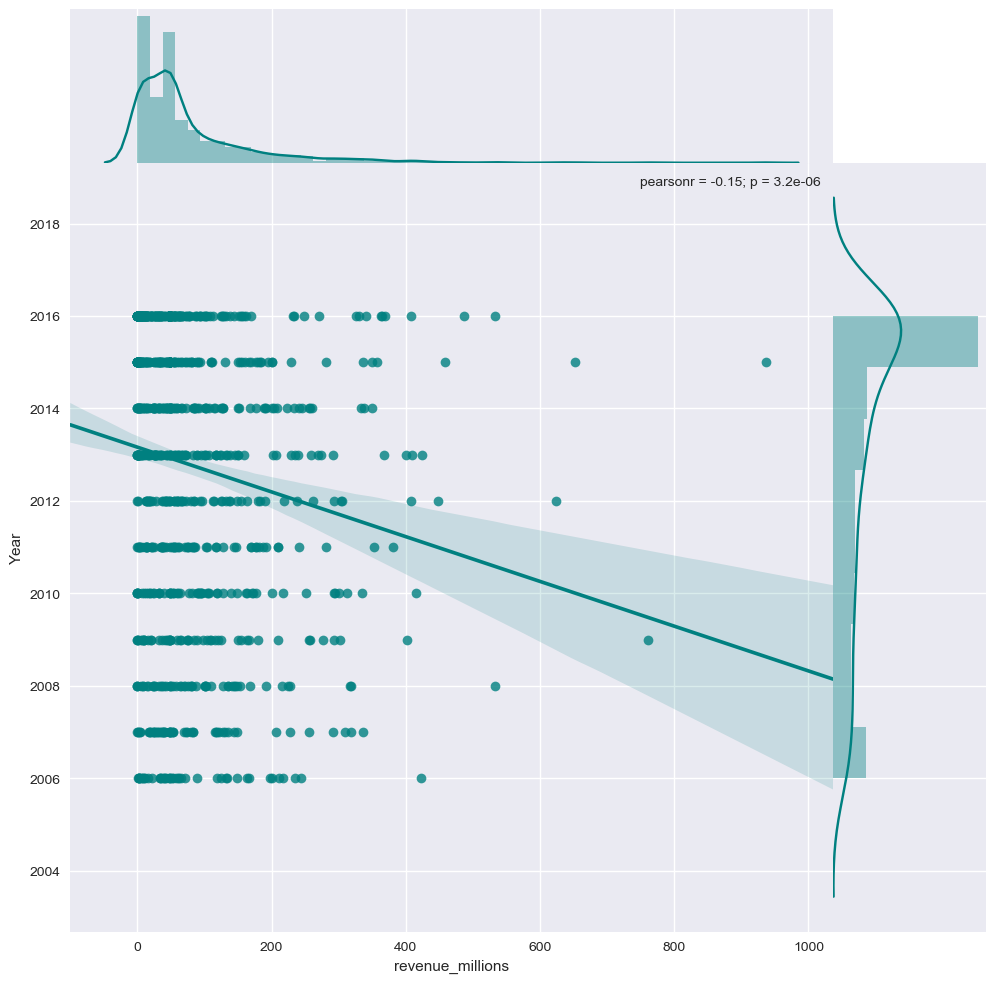

In [135]:
#Array with the column names for what we want to compare the revenue to
revenue_comparisons = ['Votes','Rating','Metascore','Year']
#Iterate through each of the columns made above and plots them separately
for comparison in revenue_comparisons:
    ax = sns.jointplot(x='revenue_millions', y=comparison, data=movies_data, color='teal', size=10, space=0, kind='reg')

- Revenue increase with number of votes. High number of votes can represent high number of viewers which leads to high revenue earning.
- Revenue has medium correlation with rating and Metascore i.e. average rated movies can also earn good revenue.
- year doesn't have much impact on revenue earning.

<a id="section709"></a>
#### 7.9. Determine the amount of movies that were produced each year, from 2006-2016?

Text(0.5,1,'Movie Count by Year')

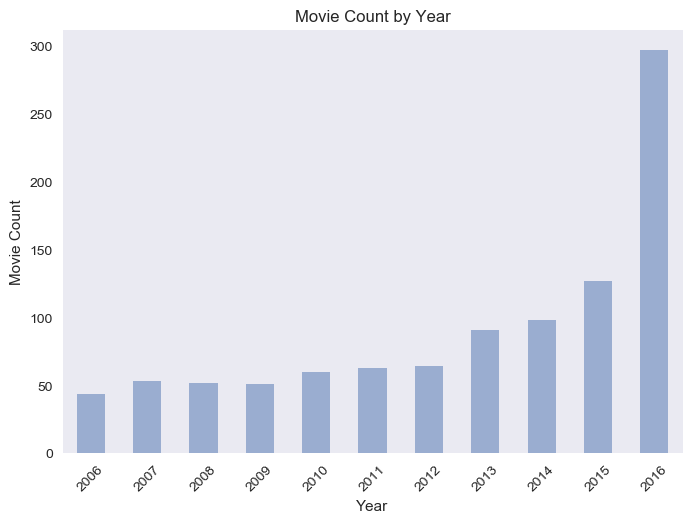

In [136]:
movie_yearly_count = movies_data['Year'].value_counts().sort_index().plot(kind='bar', color='b', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

- Highest Number of movies release in year 2016.
- From 2006 to 2012, the increment in number of movies produced was of gradual increasing pattern. But, from year 2013 to 2016, it is exponential increment.

<a id="section710"></a>
#### 7.10. How rating varies with different parameters?

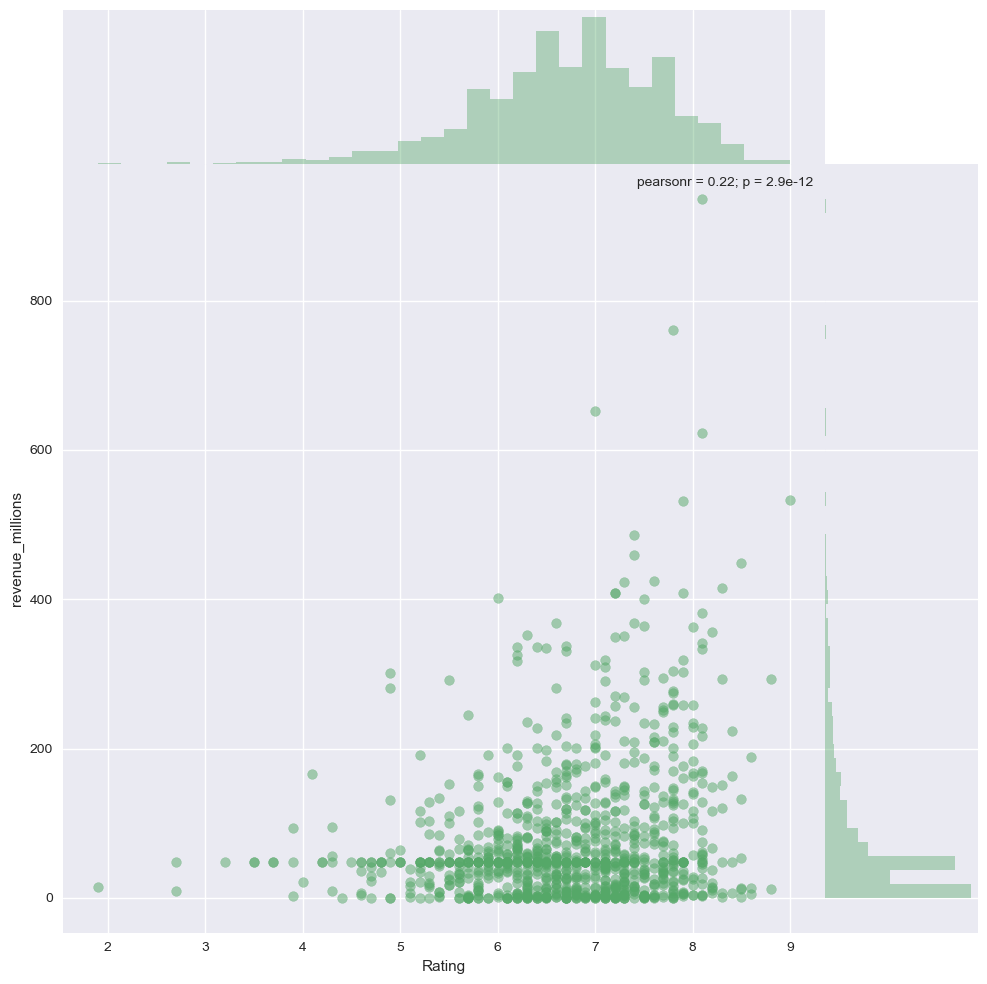

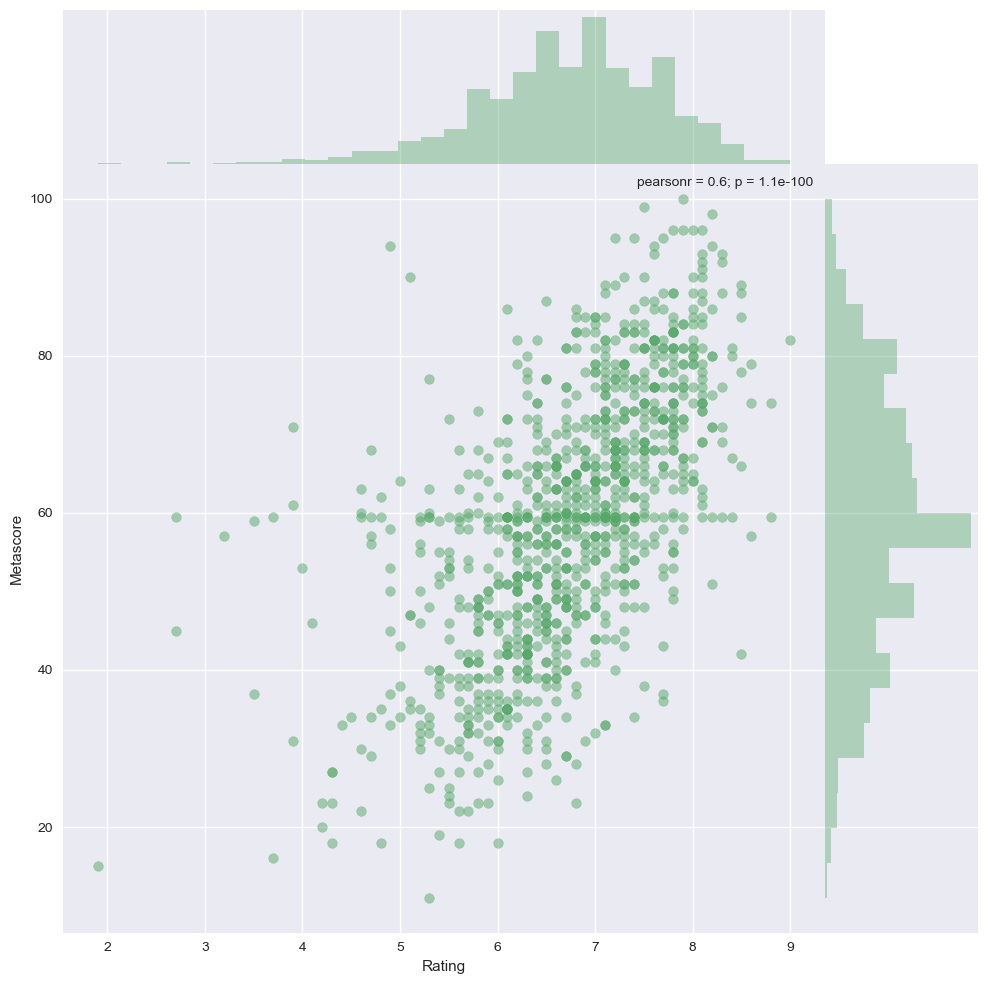

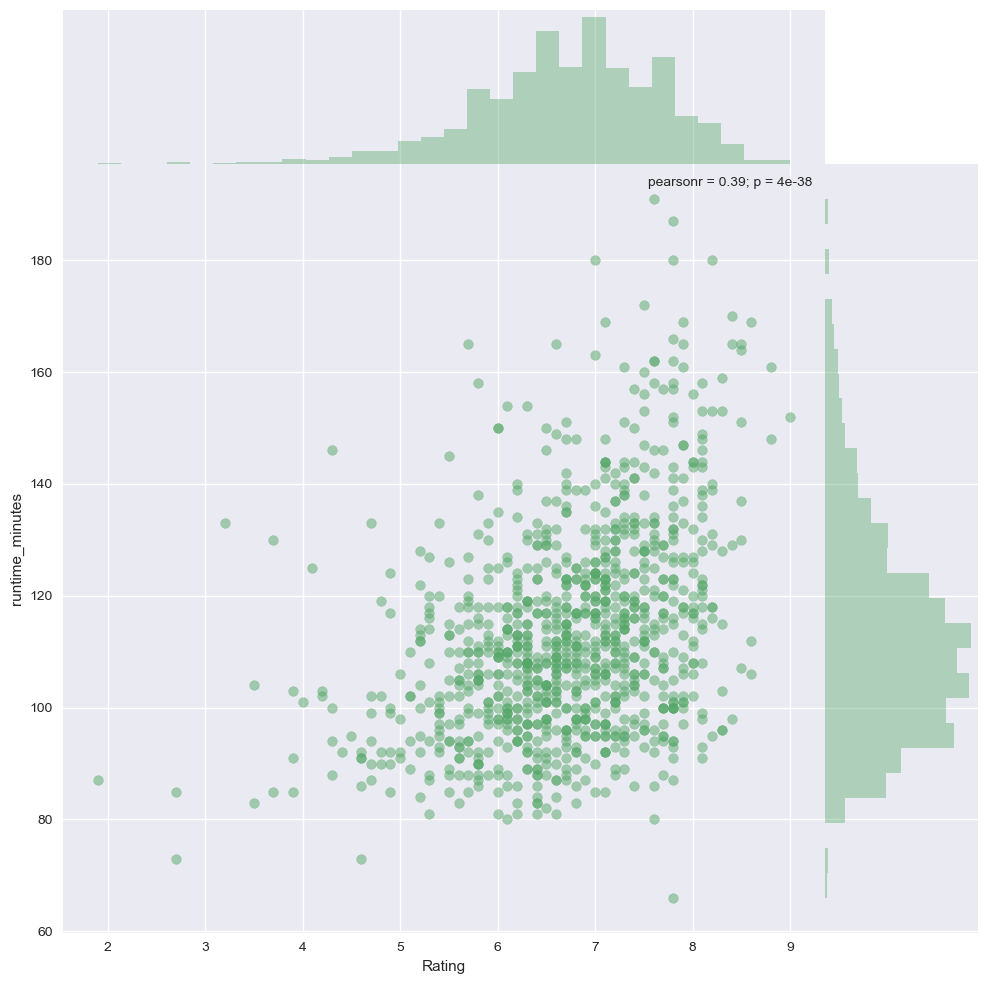

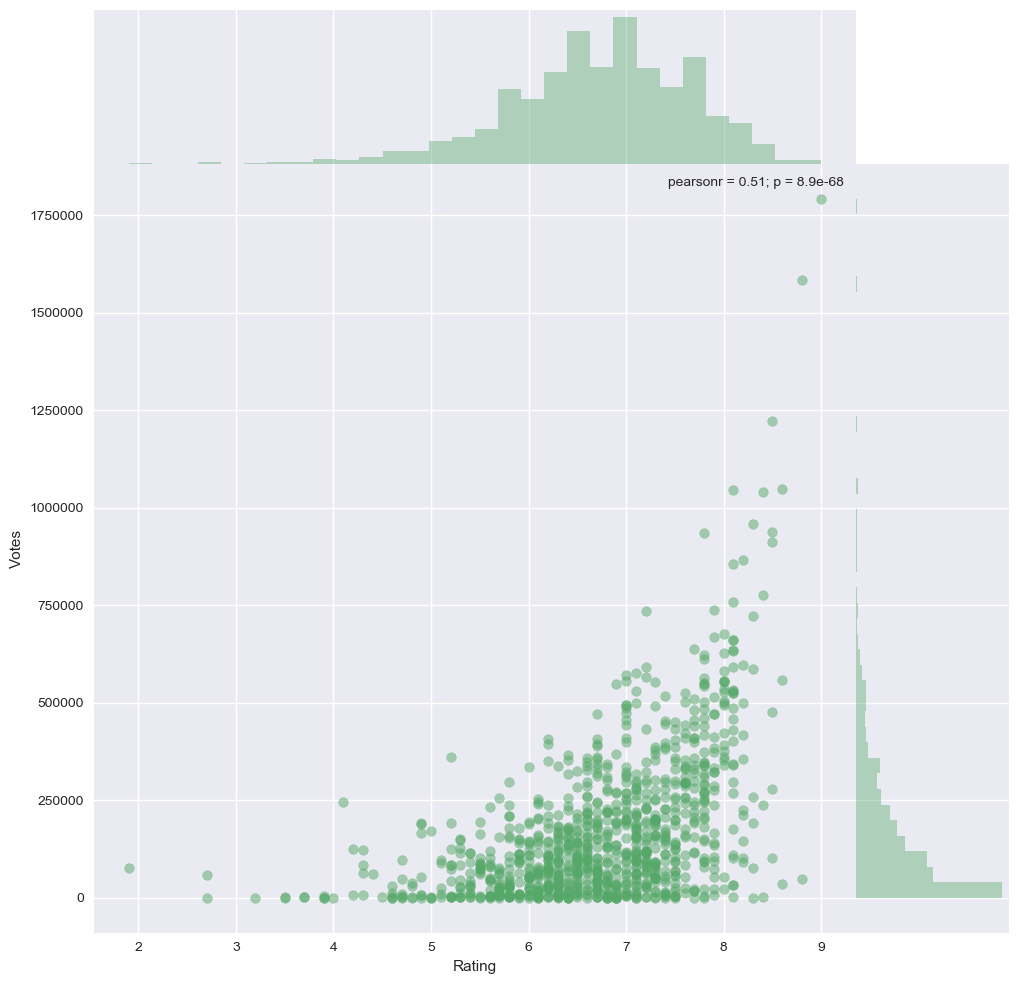

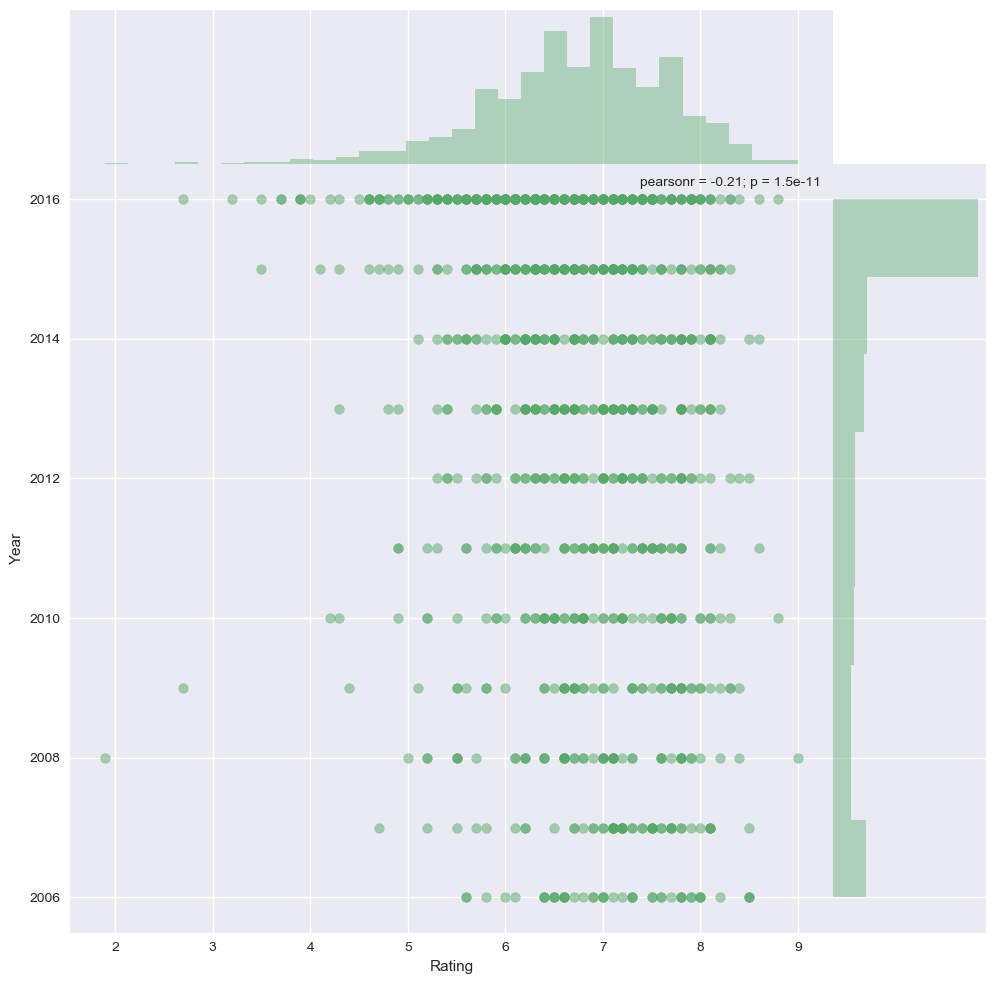

In [137]:
#Create an array that contains the column names for what we want to compare the ratings to
#in order to see if ratings have any correlation with other aspects of the movies

ratings_comparisons = ['revenue_millions', 'Metascore', 'runtime_minutes', 'Votes', 'Year']

#Created a for loop that iterates through each of the comparisons made above and plots them separately
for comparison in ratings_comparisons:
    sns.jointplot(x='Rating', y=comparison, data=movies_data, alpha=0.5, color='g', size=10, space=0)

- Rating doesn't vary much with Number of votes and Runtime of movie.
- Rating and Metascore follow a similar pattern.
- Rating doesn't have a convincing pattern with year. Most of the Old movies are of good rating but Number of old movies procuced are very less. 
- More number of new movies are getting average and bad rating than old movies, But, Number of new movies procuced are very high than old movies. 

<a id="section711"></a>
#### 7.11. How many romantic movies released each year?

Number of Romantic movies in each year: 



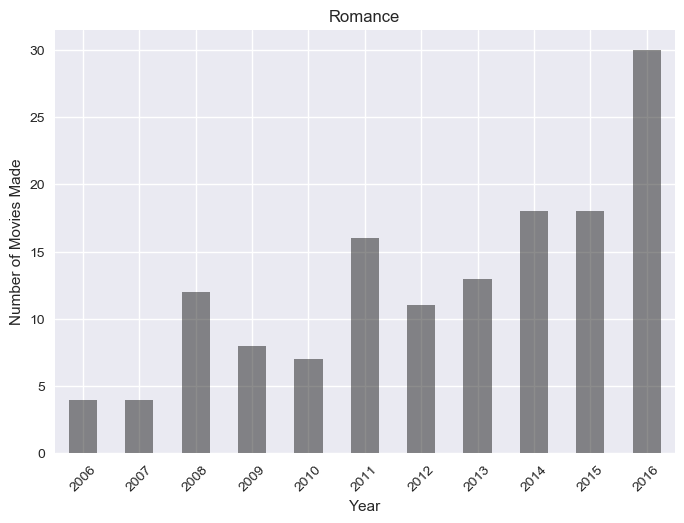

In [138]:
print('Number of Romantic movies in each year: \n')

def movies_released_by_year_plot(genre_name):
    for genre in individual_genres:
        if(genre == genre_name):
            current_genre = movies_data['Genre'].str.contains(genre).fillna(False)
            plt.figure()
            plt.xlabel('Year')
            plt.ylabel('Number of Movies Made')
            plt.title(str(genre))
            movies_data[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='k', alpha=0.5, rot=45)
            
movies_released_by_year_plot('Romance')

- From above we can determine the the number of Romantic movies produced each year.

<a id="section712"></a>
#### 7.12. What is the percentage of Total Movies Made from Top 5 Genres?
Determine the percent of total entries are attributed to each genre. Keep in mind that 
since some films have multiple genres, these percentages won't add to 100%

In [139]:
genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies_data['Genre'].str.contains(genre).fillna(False)
    pct = len(movies_data[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    #print(genre, pct)

#Throw our genre percentage values into a DF for easy plotting

genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
print(genre_pcts_df.sort_values(by='Percent', ascending=False).head(5))

           Percent
Drama         51.3
Action        30.3
Comedy        27.9
Adventure     25.9
Thriller      19.5


<a id="section713"></a>
#### 7.13. Taking a sum of the total movies made by top 5 genres, which contributed to the most in terms of movies made?

Text(0.5,1,'Percentage of Total Movies Made from Top 5 Genres')

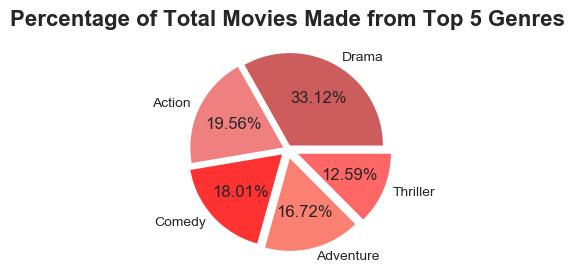

In [140]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#CD5C5C', '#F08080','#ff3232', '#FA8072', '#ff6666']
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(3,3), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percentage of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

<a id="section714"></a>
#### 7.14. What is the percentage of Total Movies Made by Top 5 Actors?
Determine the percent of total entries are attributed to each actor. Keep in mind that since some films have multiple actors, these percentages won't add to 100%.
Films of the dataset are consist of multiple actors, So, for analysis, we need to find the unique actor names

In [141]:
unique_actors = movies_data['Actors'].unique()
individual_actors = []
for actor in unique_actors:
    individual_actors.append(actor.split(','))

individual_actors = list(itertools.chain.from_iterable(individual_actors))
individual_actors = set(individual_actors)

print('Total unique actors : ',len(individual_actors))

Total unique actors :  2394


In [142]:
actor_pcts = np.zeros(len(individual_actors))
i = 0
for actor in individual_actors:
    current_actor = movies_data['Actors'].str.contains(actor).fillna(False)
    pct = len(movies_data[current_actor]) / 1000 * 100
    actor_pcts[i] = pct
    i += 1
    #print(actor, pct)

#Throw our actor percentage values into a DF for easy plotting

actor_pcts_df = pd.DataFrame(actor_pcts, index=individual_actors, columns=['Percent'])
actor_pcts_df.sort_values(by='Percent', ascending=False).head(5)

,Percent
Mark Wahlberg,1.5
Hugh Jackman,1.4
Brad Pitt,1.3
Christian Bale,1.3
Anne Hathaway,1.2


<a id="section715"></a>
#### 7.15. Taking a sum of the total movies made by top 5 actors, which contributed to the most in terms of movies made?

Text(0.5,1,'Percentage of Total Movies Made by Top 5 Actors')

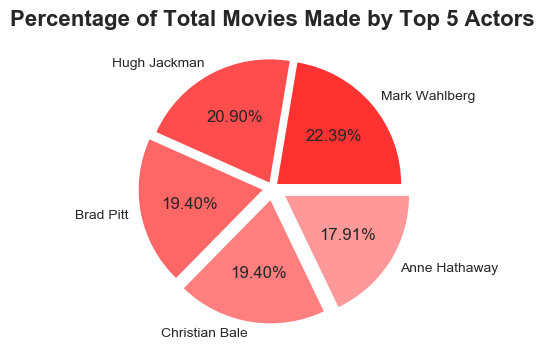

In [143]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
actor_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(4,4), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percentage of Total Movies Made by Top 5 Actors', weight='bold', fontsize=16)

<a id="section716"></a>
#### 7.16. What is the revenue percentage of Total Movies Made from Top 5 Genres?

In [144]:
#Same idea as above, but we can determine revenue percentage

genre_revenue_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies_data['Genre'].str.contains(genre).fillna(False)
    revenue_pct = movies_data[current_genre].xs('revenue_millions', axis=1).sum() / movies_data['revenue_millions'].sum() * 100
    genre_revenue_pcts[i] = revenue_pct
    i += 1
    #print(genre, revenue_pct)

genre_revenue_pcts_df = pd.DataFrame(genre_revenue_pcts, index=individual_genres, columns=['Percent'])
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5)

,Percent
Adventure,49.934359
Action,46.408189
Drama,32.408693
Comedy,26.080631
Sci-Fi,19.610885


<a id="section717"></a>
#### 7.17. Taking a sum of the revenue from the top 5 genres, which contributed to the most in terms of revenue?

Text(0.5,1,'Percentage of Total Revenue from Top 5 Genres')

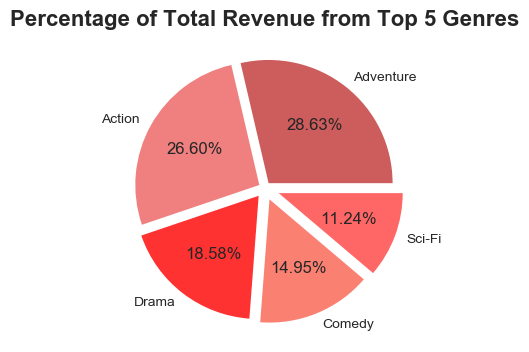

In [152]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#CD5C5C', '#F08080','#ff3232', '#FA8072', '#ff6666']
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(4,4), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percentage of Total Revenue from Top 5 Genres', weight='bold', fontsize=16)

<a id="section718"></a>
####  7.18. Who are the top Directors in terms of number of films directed by them? Also, determine how much revenue earned by each director?

In [146]:
most_active_directors = movies_data['Director'].value_counts().head(10)
print(most_active_directors.index)

Index(['Ridley Scott', 'M. Night Shyamalan', 'Paul W.S. Anderson',
       'Michael Bay', 'David Yates', 'Danny Boyle', 'J.J. Abrams',
       'Denis Villeneuve', 'Woody Allen', 'Martin Scorsese'],
      dtype='object')


In [147]:
director_revenue_totals = np.zeros(len(most_active_directors))
i = 0
for director in most_active_directors.index:
    current_director = movies_data['Director'].str.contains(director).fillna(False)
    director_film_revenue = movies_data[current_director].xs('revenue_millions', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
    #print(director, director_film_revenue)

director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=most_active_directors.index, columns=['Revenue (Millions)'])
director_revenue_totals_df.sort_values(by='Revenue (Millions)', ascending=False).head(5)

,Revenue (Millions)
J.J. Abrams,1683.45
David Yates,1630.51
Michael Bay,1421.32
Ridley Scott,719.06
Martin Scorsese,458.11


Text(0.5,1,'Most Active Directors Revenue Contribution')

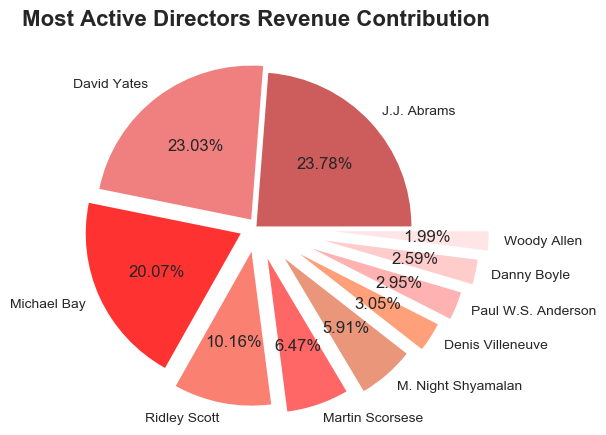

In [148]:
explode = np.linspace(0, 0.5, 10)
colors = ['#CD5C5C', '#F08080','#ff3232', '#FA8072', '#ff6666', '#E9967A', '#FFA07A', '#ffb2b2', '#ffcccc', '#ffe5e5', ]
director_revenue_totals_df.sort_values(by='Revenue (Millions)', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(5,5), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=16)

<a id="section8"></a>
### 8. Conclusion

- Good rating movie have good metascore.
- Movies in which technologies are used on large scale like scientific, animation, action are earning good revenue
- The total revenue for Old movies is less as compared to new movies which depicts more industry exposure to end customers.
- To earn good revenue, movie Producers should consider "Director vs revenue", "Actor vs Revenue", "Genre vs Revenue" plot for deciding a combination in a movie. Similar appraoch should follow for good rating.
- Horror movies are not a good choice for good revenue and good rating.
- War movies is the best choice for good rating movie.
- Sci-Fi, Animation and War are some geners of which movies are good deal for good rating and good revenue.
- So if anyone is planning for making a movie then he should consider the 2nd and 4th point in mind before risking anything.